[*********************100%***********************]  1 of 1 completed

c:\Users\hj\OneDrive\Documents\project\env\Lib\site-packages\yfinance\base.py:304: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
c:\Users\hj\OneDrive\Documents\project\env\Lib\site-packages\yfinance\base.py:305: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

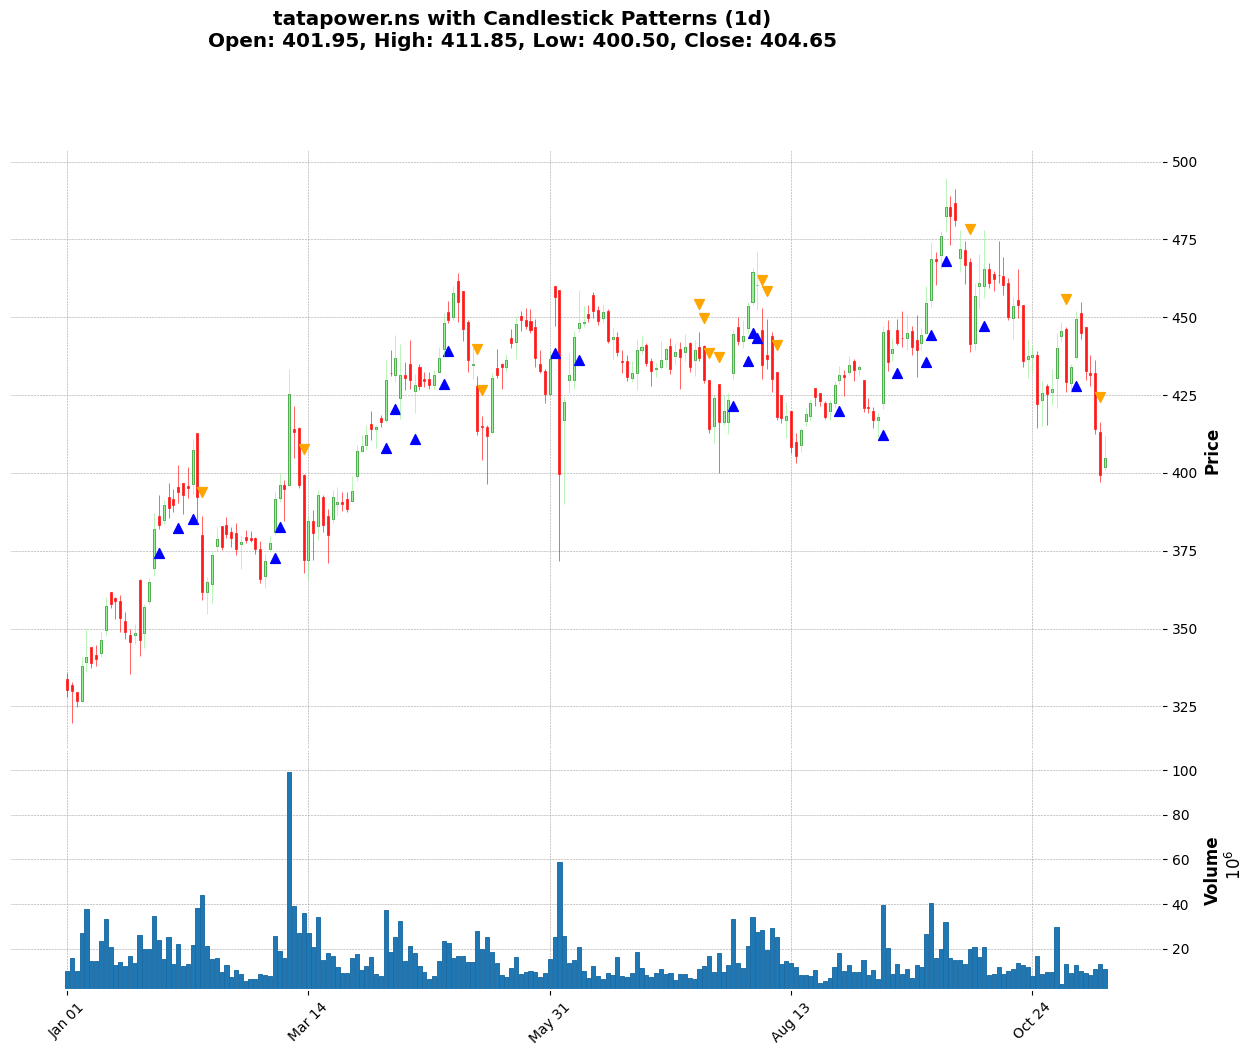


Detected Patterns:
- 2024-01-05: Hammer - Suggested Action: Buy
- 2024-01-05: Bullish Flag - Suggested Action: Buy
- 2024-01-08: Bearish Engulfing - Suggested Action: Sell
- 2024-01-09: Shooting Star - Suggested Action: Sell
- 2024-01-10: Bullish Flag - Suggested Action: Buy
- 2024-01-11: Bullish Flag - Suggested Action: Buy
- 2024-01-12: Bearish Engulfing - Suggested Action: Sell
- 2024-01-12: Bullish Flag - Suggested Action: Buy
- 2024-01-17: Bearish Flag - Suggested Action: Sell
- 2024-01-18: Bearish Flag - Suggested Action: Sell
- 2024-01-19: Hammer - Suggested Action: Buy
- 2024-01-23: Bearish Engulfing - Suggested Action: Sell
- 2024-01-25: Bullish Flag - Suggested Action: Buy
- 2024-01-29: Bullish Flag - Suggested Action: Buy
- 2024-01-30: Bearish Engulfing - Suggested Action: Sell
- 2024-01-30: Bullish Flag - Suggested Action: Buy
- 2024-02-01: Bearish Engulfing - Suggested Action: Sell
- 2024-02-05: Shooting Star - Suggested Action: Sell
- 2024-02-05: Bullish Flag - Suggested

In [3]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import numpy as np

# User inputs for stock symbol and date range
symbol = input("Enter the stock symbol (e.g., TATAMOTORS.NS for Tata Motors): ")
start_date = input("Enter the start date (YYYY-MM-DD): ")
end_date = input("Enter the end date (YYYY-MM-DD): ")

# Define candle interval based on the date range
date_range = pd.to_datetime(end_date) - pd.to_datetime(start_date)
if date_range.days <= 1:
    interval = '5m'  
elif date_range.days <= 5:
    interval = '15m'  
elif date_range.days <= 30:
    interval = '1h'  
else:
    interval = '1d'  

# Fetch historical data
df = yf.download(symbol, start=start_date, end=end_date, interval=interval)

# Check if data is empty
if df.empty:
    print(f"Error: No data found for {symbol}. Please check the symbol or the date range.")
else:
    # Function to detect patterns
    def detect_patterns(df):
        patterns = []
        for i in range(1, len(df)):
            # Bullish and Bearish Engulfing
            if df['Close'][i] > df['Open'][i] and df['Close'][i - 1] < df['Open'][i - 1] and df['Open'][i] < df['Close'][i - 1]:
                patterns.append((df.index[i], 'Bullish Engulfing', 'Buy'))
            elif df['Close'][i] < df['Open'][i] and df['Close'][i - 1] > df['Open'][i - 1] and df['Open'][i] > df['Close'][i - 1]:
                patterns.append((df.index[i], 'Bearish Engulfing', 'Sell'))

            # Hammer and Shooting Star
            elif df['Close'][i] > df['Open'][i] and (df['Open'][i] - df['Low'][i]) > 2 * (df['Close'][i] - df['Open'][i]):
                patterns.append((df.index[i], 'Hammer', 'Buy'))
            elif df['Open'][i] > df['Close'][i] and (df['High'][i] - df['Open'][i]) > 2 * (df['Open'][i] - df['Close'][i]):
                patterns.append((df.index[i], 'Shooting Star', 'Sell'))

            # Flag Patterns (Bullish and Bearish)
            if i > 1:
                # Bullish Flag (Upward movement followed by consolidation)
                if df['Close'][i] > df['Close'][i - 1] and df['Close'][i - 1] > df['Close'][i - 2] and \
                   df['High'][i] > df['High'][i - 1] and df['Low'][i] > df['Low'][i - 1]:
                    patterns.append((df.index[i], 'Bullish Flag', 'Buy'))
                
                # Bearish Flag (Downward movement followed by consolidation)
                elif df['Close'][i] < df['Close'][i - 1] and df['Close'][i - 1] < df['Close'][i - 2] and \
                     df['High'][i] < df['High'][i - 1] and df['Low'][i] < df['Low'][i - 1]:
                    patterns.append((df.index[i], 'Bearish Flag', 'Sell'))

            # Morning Star and Evening Star
            elif (i >= 2 and df['Close'][i - 2] < df['Open'][i - 2] and df['Close'][i] > df['Open'][i] and
                  df['Close'][i] > df['Close'][i - 2] and df['Close'][i - 1] < df['Open'][i - 1]):
                patterns.append((df.index[i], 'Morning Star', 'Buy'))
            elif (i >= 2 and df['Close'][i - 2] > df['Open'][i - 2] and df['Close'][i] < df['Open'][i] and
                  df['Close'][i] < df['Close'][i - 2] and df['Close'][i - 1] > df['Open'][i - 1]):
                patterns.append((df.index[i], 'Evening Star', 'Sell'))

            # Doji
            elif abs(df['Close'][i] - df['Open'][i]) < 0.001 * (df['High'][i] - df['Low'][i]):
                patterns.append((df.index[i], 'Doji', 'Neutral'))

            # Bullish Harami and Bearish Harami
            elif df['Close'][i] > df['Open'][i] and df['Open'][i - 1] > df['Close'][i - 1] and df['Close'][i] < df['Open'][i - 1] and df['Open'][i] > df['Close'][i - 1]:
                patterns.append((df.index[i], 'Bullish Harami', 'Buy'))
            elif df['Close'][i] < df['Open'][i] and df['Open'][i - 1] < df['Close'][i - 1] and df['Close'][i] > df['Open'][i - 1] and df['Open'][i] < df['Close'][i - 1]:
                patterns.append((df.index[i], 'Bearish Harami', 'Sell'))

            # Piercing Line and Dark Cloud Cover
            elif df['Close'][i] > df['Open'][i] and df['Close'][i - 1] < df['Open'][i - 1] and df['Close'][i] > df['Open'][i - 1]:
                patterns.append((df.index[i], 'Piercing Line', 'Buy'))
            elif df['Close'][i] < df['Open'][i] and df['Close'][i - 1] > df['Open'][i - 1] and df['Close'][i] < df['Open'][i - 1]:
                patterns.append((df.index[i], 'Dark Cloud Cover', 'Sell'))

            # Spinning Top
            elif abs(df['Open'][i] - df['Close'][i]) <= 0.1 * (df['High'][i] - df['Low'][i]):
                patterns.append((df.index[i], 'Spinning Top', 'Neutral'))

        return patterns

    # Check if signal is valid based on trend and volume
    def is_signal_valid(df, signal_date, action):
        index = df.index.get_loc(signal_date)

        # Trend Confirmation (moving average)
        moving_average = df['Close'].rolling(window=20).mean()
        price = df['Close'][index]

        if action == 'Buy' and price > moving_average[index]:
            trend_valid = True
        elif action == 'Sell' and price < moving_average[index]:
            trend_valid = True
        else:
            trend_valid = False

        # Volume Confirmation
        volume_avg = df['Volume'].rolling(window=20).mean()
        volume_valid = df['Volume'][index] > volume_avg[index]

        return trend_valid and volume_valid

    # Detect patterns
    patterns = detect_patterns(df)

    # If no patterns are found
    if not patterns:
        print("No patterns found.")
    else:
        # Custom color scheme for candles
        candle_colors = mpf.make_marketcolors(up='lightgreen', down='red', wick={'up': 'lightgreen', 'down': 'red'}, edge={'up': 'green', 'down': 'red'})
        my_style = mpf.make_mpf_style(base_mpf_style='charles', marketcolors=candle_colors)

        # Prepare signals
        valid_buy_signals = [np.nan] * len(df)
        valid_sell_signals = [np.nan] * len(df)

        # Set buy and sell signals if valid
        for date, pattern, action in patterns:
            if is_signal_valid(df, date, action):
                if action == 'Buy':
                    valid_buy_signals[df.index.get_loc(date)] = df.loc[date, 'Low'] * 0.98
                elif action == 'Sell':
                    valid_sell_signals[df.index.get_loc(date)] = df.loc[date, 'High'] * 1.02

        # Remove NaN values for plotting
        valid_buy_signals = [x if not np.isnan(x) else np.nan for x in valid_buy_signals]
        valid_sell_signals = [x if not np.isnan(x) else np.nan for x in valid_sell_signals]

        # Prepare addplot with valid signals
        addplot = [
            mpf.make_addplot(valid_buy_signals, type='scatter', markersize=50, marker='^', color='blue', panel=0),
            mpf.make_addplot(valid_sell_signals, type='scatter', markersize=50, marker='v', color='orange', panel=0)
        ]

        # Plot the chart
        last_day = df.iloc[-1]
        last_day_values = f"Open: {last_day['Open']:.2f}, High: {last_day['High']:.2f}, Low: {last_day['Low']:.2f}, Close: {last_day['Close']:.2f}"

        mpf.plot(df, type='candle', style=my_style, title=f'{symbol} with Candlestick Patterns ({interval})\n{last_day_values}',
                 addplot=addplot, volume=True, figratio=(16, 9), figsize=(16, 12),
                 ylabel='Price', ylabel_lower='Volume')

       #  Display detected patterns and recommendations
    print("\nDetected Patterns:")
    for date, pattern, action in patterns:
        print(f"- {date.date()}: {pattern} - Suggested Action: {action}")
